## Wavelet Practice: Spy

A door is encoded with a number pad (0-9). We can't see the door, but through nefariouis means we have a recording of someone opening it. Quick, we need to decode this [mystery signal](data/mystery_signal.wav)! The door code is encoded in this mystery_signal.wav file but we need to know what music notes and their order to open it

We know that the door code is set up as:
- A note: 0
- B note: 1
- C note: 2
- D note: 3
- E note: 4
- F note: 5

In [5]:
import IPython
IPython.display.Audio("data/mystery_signal.wav")

First, let's us extract and review the raw audio .wav file

In [13]:
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_6685/2458665191.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_data = np.fromstring(signal, np.int64)


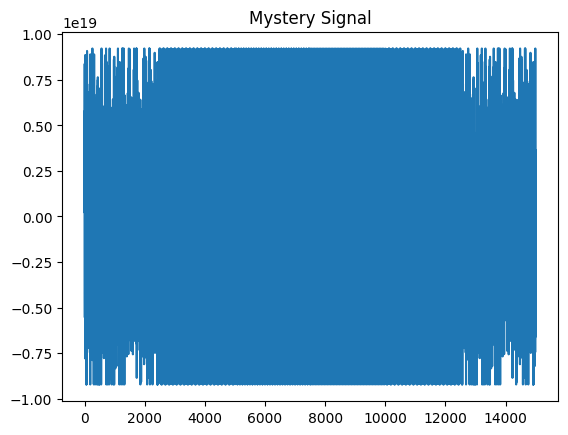

In [15]:
import wave # package to open raw audio files

mystery_signal = wave.open("data/mystery_signal.wav", "r")

# Extract raw audio
signal = mystery_signal.readframes(-1)
signal_data = np.fromstring(signal, np.int64)

plt.title("Mystery Signal")
plt.plot(signal_data)
plt.show()

In [19]:
import pandas as pd

signal_df = pd.DataFrame(data=signal_data)

signal_df.head(10)

,0
0,4099413790496140206
1,1563153385191199858
2,8379786076830324125
3,200991189531426949
4,5802805340873229669
5,-4276548989724783832
6,-5542774553291089396
7,5421176118455949066
8,2275699945478366731
9,327068408346003558
